# Linear regression to predict prices of rental apartments

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


## Import the apartment data

In [2]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("./Data/apartments_data_enriched_cleaned.csv", 
                      sep=";", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
503    120
6       65
400     90
644     63
484     91
Name: area, dtype: int64 

y_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


Dieser Code führt eine Aufteilung eines Datensatzes in Trainings- und Testdaten durch und zeigt die ersten paar Zeilen der Trainingsdaten an. Hier ist eine detaillierte Erklärung:

1. **Datensatzaufteilung**:
   ```python
   X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                       df['price'], 
                                                       test_size=0.20, 
                                                       random_state=42)
   ```
   - [`train_test_split`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A35%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Diese Funktion aus der Bibliothek `sklearn.model_selection` teilt den Datensatz in Trainings- und Testdaten auf.
   - [`df['area']`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A52%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Dies ist die unabhängige Variable (Feature), die die Fläche der Wohnungen darstellt.
   - [`df['price']`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A52%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Dies ist die abhängige Variable (Ziel), die die Preise der Wohnungen darstellt.
   - [`test_size=0.20`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A52%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): 20% der Daten werden als Testdaten verwendet, während die restlichen 80% als Trainingsdaten verwendet werden.
   - [`random_state=42`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A52%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Dies stellt sicher, dass die Aufteilung reproduzierbar ist. Jedes Mal, wenn der Code ausgeführt wird, wird die gleiche Aufteilung erzeugt.

2. **Anzeigen der Trainingsdaten**:
   ```python
   # Show X_train
   print('X_train:')
   print(X_train.head(), '\n')
   ```
   - [`print('X_train:')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Gibt den Text "X_train:" aus.
   - [`X_train.head()`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Zeigt die ersten fünf Zeilen der Trainingsdaten für die unabhängige Variable (Fläche) an.

3. **Anzeigen der Zielwerte der Trainingsdaten**:
   ```python
   # Show y_train
   print('y_train:')
   print(y_train.head())
   ```
   - [`print('y_train:')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Gibt den Text "y_train:" aus.
   - [`y_train.head()`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X10sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A17%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Zeigt die ersten fünf Zeilen der Trainingsdaten für die abhängige Variable (Preis) an.

Zusammengefasst: Der Code teilt den Datensatz in Trainings- und Testdaten auf und zeigt die ersten paar Zeilen der Trainingsdaten für die Fläche und die Preise der Wohnungen an.

### Fit the simple linear regression model

In [4]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            1272.94
Slope of regression line (beta):          13.548
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3678


### Plot regression line

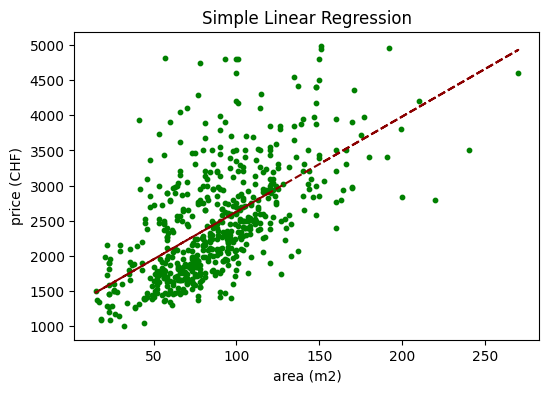

In [5]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

Dieser Code führt eine lineare Regression durch und gibt die Ergebnisse der Regression aus. Hier ist eine detaillierte Erklärung:

1. **Anpassen des Regressionsmodells**:
   ```python
   slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)
   ```
   - [`stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html): Diese Funktion aus der `scipy.stats`-Bibliothek führt eine einfache lineare Regression durch.
   - [`X_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A51%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Die unabhängige Variable (Feature), die die Fläche der Wohnungen darstellt.
   - [`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A60%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Die abhängige Variable (Ziel), die die Preise der Wohnungen darstellt.
   - Die Funktion gibt mehrere Werte zurück:
     - [`slope`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Die Steigung der Regressionslinie (beta).
     - [`intercept`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A7%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Der Achsenabschnitt der Regressionslinie (alpha).
     - [`r`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A18%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Der Korrelationskoeffizient.
     - [`p`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A21%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Der p-Wert für die Hypothese, dass die Steigung null ist.
     - [`std_err`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A24%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Der Standardfehler der geschätzten Steigung.

2. **Ausgabe der Ergebnisse des Regressionsmodells**:
   ```python
   print('Linear regression result:')
   print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
   print(f'Slope of regression line (beta):          {slope:.3f}')
   print(f'p-value:                                  {p:.4f}')
   print(f'R-squared (coefficient of determination): {r**2:.4f}')
   ```
   - [`print('Linear regression result:')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A0%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Gibt den Text "Linear regression result:" aus.
   - [`print(f'Intercept with y-axis (alpha): {intercept:.2f}')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A0%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Gibt den Achsenabschnitt (alpha) der Regressionslinie aus, formatiert auf zwei Dezimalstellen.
   - [`print(f'Slope of regression line (beta): {slope:.3f}')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A0%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Gibt die Steigung (beta) der Regressionslinie aus, formatiert auf drei Dezimalstellen.
   - [`print(f'p-value: {p:.4f}')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A0%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Gibt den p-Wert aus, formatiert auf vier Dezimalstellen.
   - [`print(f'R-squared (coefficient of determination): {r**2:.4f}')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A0%7D%7D%5D%2C%2284a6de3d-6a83-49be-a3ee-e9980e05ade6%22%5D "Go to definition"): Gibt den Bestimmtheitsmaß (R²) aus, formatiert auf vier Dezimalstellen. R² ist das Quadrat des Korrelationskoeffizienten und gibt an, wie gut die unabhängige Variable die abhängige Variable erklärt.

Zusammengefasst: Der Code passt ein lineares Regressionsmodell an die Trainingsdaten an und gibt die wichtigsten Ergebnisse der Regression aus, einschließlich Achsenabschnitt, Steigung, p-Wert und Bestimmtheitsmaß.

Dieser Code definiert eine Funktion zur Berechnung von Modellvorhersagen, wendet diese Funktion auf die Trainingsdaten an und erstellt ein Streudiagramm mit der Regressionslinie. Hier ist eine detaillierte Erklärung:

1. **Funktion zur Berechnung von Modellvorhersagen**:
   ```python
   def myfunc(x):
       return slope * x + intercept
   ```
   - [`def myfunc(x)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Definiert eine Funktion [`myfunc`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A4%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition"), die eine Eingabe [`x`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A11%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition") akzeptiert.
   - [`return slope * x + intercept`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Berechnet die Vorhersage des Modells für [`x`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A11%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition") unter Verwendung der Steigung ([`slope`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A11%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition")) und des Achsenabschnitts ([`intercept`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A23%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition")) der Regressionslinie.

2. **Anwenden der Funktion auf die Trainingsdaten**:
   ```python
   mymodel = pd.Series(map(myfunc, X_train))
   ```
   - [`pd.Series(map(myfunc, X_train))`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Wendet die Funktion [`myfunc`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A4%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition") auf jedes Element in [`X_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A32%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition") an und erstellt eine [`pd.Series`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A10%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition") mit den Vorhersagen.

3. **Erstellen eines Streudiagramms mit der Regressionslinie**:
   ```python
   plt.figure(figsize=(6,4))
   plt.scatter(X_train, y_train, s=10, color='green')
   plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
   plt.title('Simple Linear Regression')
   plt.xlabel('area (m2)')
   plt.ylabel('price (CHF)')
   plt.show()
   ```
   - [`plt.figure(figsize=(6,4))`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Erstellt eine neue Abbildung mit einer Größe von 6x4 Zoll.
   - [`plt.scatter(X_train, y_train, s=10, color='green')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Erstellt ein Streudiagramm der Trainingsdaten ([`X_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A32%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition") gegen [`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A9%2C%22character%22%3A21%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition")) mit grünen Punkten und einer Punktgröße von 10.
   - [`plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Zeichnet die Regressionslinie ([`X_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A32%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition") gegen [`mymodel`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X14sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A0%7D%7D%5D%2C%22fa8b357d-0b29-4b98-95ff-1f44a1c6f862%22%5D "Go to definition")) mit einer dunkelroten gestrichelten Linie.
   - [`plt.title('Simple Linear Regression')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Fügt dem Diagramm den Titel "Simple Linear Regression" hinzu.
   - [`plt.xlabel('area (m2)')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Beschriftet die x-Achse mit "area (m2)".
   - [`plt.ylabel('price (CHF)')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Beschriftet die y-Achse mit "price (CHF)".
   - [`plt.show()`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22de4fef56-4019-450f-bebe-1dda19f239cd%22%5D "Go to definition"): Zeigt das Diagramm an.

Zusammengefasst: Der Code definiert eine Funktion zur Berechnung der Vorhersagen des Regressionsmodells, wendet diese Funktion auf die Trainingsdaten an und erstellt ein Streudiagramm der Trainingsdaten mit der Regressionslinie.

### Check model residuals (residuals = observed prices minus predicted prices)

In [6]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 2898.72
1st Observed price in dataset: 1441.00
1st Residual price in dataset: -1457.72


### Plot histogram of residuals

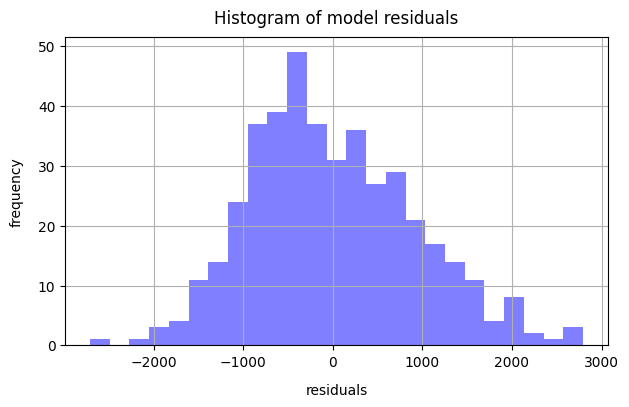

In [7]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [8]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 2031.6
Observed price: 1640.0, Predicted price: 2004.5
Observed price: 1568.0, Predicted price: 2167.1
Observed price: 2290.0, Predicted price: 2207.8
Observed price: 4950.0, Predicted price: 2627.8
Observed price: 1787.0, Predicted price: 2248.4
Observed price: 3495.0, Predicted price: 2519.4
Observed price: 2450.0, Predicted price: 2031.6
Observed price: 3390.0, Predicted price: 2871.6
Observed price: 2836.0, Predicted price: 2573.6


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [9]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area     pop_dens
503   120   165.018625
6      65   525.662252
400    90   424.146342
644    63  1044.628957
484    91   399.525129 

y2_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [10]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     409.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          3.50e-111
Time:                        16:55:36   Log-Likelihood:                -4420.2
No. Observations:                 577   AIC:                             8846.
Df Residuals:                     574   BIC:                             8860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.1861     78.086      4.241      0.0

Dieser Code erstellt ein multiples lineares Regressionsmodell und gibt eine Zusammenfassung der Modellanpassung aus. Hier ist eine detaillierte Erklärung:

### Erklärung des Codes

1. **Konstante zum Modell hinzufügen**:
   ```python
   X2_train_const = sm.add_constant(X2_train)
   ```
   Diese Zeile fügt eine Konstante (Intercept) zu den Trainingsdaten ([`X2_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X31sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A33%7D%7D%5D%2C%22afb47890-a458-438a-b9b8-72b7082c578a%22%5D "Go to definition")) hinzu. Dies ist notwendig, da das Regressionsmodell auch einen Intercept-Term hat.

2. **Erstellen des multiplen Regressionsmodells**:
   ```python
   olsmod = sm.OLS(y_train, X2_train_const)
   ```
   Diese Zeile erstellt ein multiples lineares Regressionsmodell mit den abhängigen Variablen ([`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X31sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A16%7D%7D%5D%2C%22afb47890-a458-438a-b9b8-72b7082c578a%22%5D "Go to definition")) und den unabhängigen Variablen ([`X2_train_const`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X31sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22afb47890-a458-438a-b9b8-72b7082c578a%22%5D "Go to definition")).

3. **Anpassen des Modells**:
   ```python
   olsres = olsmod.fit()
   ```
   Diese Zeile passt das Modell an die Daten an und speichert die Ergebnisse in [`olsres`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X31sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A0%7D%7D%5D%2C%22afb47890-a458-438a-b9b8-72b7082c578a%22%5D "Go to definition").

4. **Ausgabe der vollständigen Modellzusammenfassung**:
   ```python
   print(olsres.summary())
   ```
   Diese Zeile druckt eine detaillierte Zusammenfassung des angepassten Modells, einschließlich der Koeffizienten, Standardfehler, t-Werte, p-Werte und des R²-Werts.

### Weitere Beispiele

#### Beispiel 1: Einfaches lineares Regressionsmodell


In [28]:
import pandas as pd
import statsmodels.api as sm

# Beispiel-Daten
data = {
    'Größe': [50, 60, 70, 80, 90],
    'Preis': [200000, 250000, 300000, 350000, 400000]
}
df = pd.DataFrame(data)

# Unabhängige Variable (Größe)
X = df['Größe']
X = sm.add_constant(X)  # Konstante hinzufügen

# Abhängige Variable (Preis)
y = df['Preis']

# Lineares Regressionsmodell erstellen
model = sm.OLS(y, X)
results = model.fit()

# Modellzusammenfassung anzeigen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.342e+30
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.42e-45
Time:                        17:22:50   Log-Likelihood:                 107.76
No. Observations:                   5   AIC:                            -211.5
Df Residuals:                       3   BIC:                            -212.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          -5e+04   3.08e-10  -1.62e+14      0.0



#### Beispiel 2: Multiple lineare Regression mit zwei unabhängigen Variablen


In [29]:
import pandas as pd
import statsmodels.api as sm

# Beispiel-Daten
data = {
    'Größe': [50, 60, 70, 80, 90],
    'Zimmer': [1, 2, 2, 3, 3],
    'Preis': [200000, 250000, 300000, 350000, 400000]
}
df = pd.DataFrame(data)

# Unabhängige Variablen (Größe und Zimmer)
X = df[['Größe', 'Zimmer']]
X = sm.add_constant(X)  # Konstante hinzufügen

# Abhängige Variable (Preis)
y = df['Preis']

# Multiples lineares Regressionsmodell erstellen
model = sm.OLS(y, X)
results = model.fit()

# Modellzusammenfassung anzeigen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.706e+29
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           5.86e-30
Time:                        17:22:55   Log-Likelihood:                 105.35
No. Observations:                   5   AIC:                            -204.7
Df Residuals:                       2   BIC:                            -205.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          -5e+04   8.87e-10  -5.64e+13      0.0



#### Beispiel 3: Multiple lineare Regression mit drei unabhängigen Variablen


In [30]:
import pandas as pd
import statsmodels.api as sm

# Beispiel-Daten
data = {
    'Größe': [50, 60, 70, 80, 90],
    'Zimmer': [1, 2, 2, 3, 3],
    'Alter': [5, 10, 15, 20, 25],
    'Preis': [200000, 250000, 300000, 350000, 400000]
}
df = pd.DataFrame(data)

# Unabhängige Variablen (Größe, Zimmer und Alter)
X = df[['Größe', 'Zimmer', 'Alter']]
X = sm.add_constant(X)  # Konstante hinzufügen

# Abhängige Variable (Preis)
y = df['Preis']

# Multiples lineares Regressionsmodell erstellen
model = sm.OLS(y, X)
results = model.fit()

# Modellzusammenfassung anzeigen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.806e+28
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.02e-29
Time:                        17:22:59   Log-Likelihood:                 103.96
No. Observations:                   5   AIC:                            -201.9
Df Residuals:                       2   BIC:                            -203.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.1526   2.89e-12  -1.08e+13      0.0



Diese Beispiele zeigen, wie man einfache und multiple lineare Regressionsmodelle mit verschiedenen unabhängigen Variablen erstellt und die Modellzusammenfassung ausgibt.

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

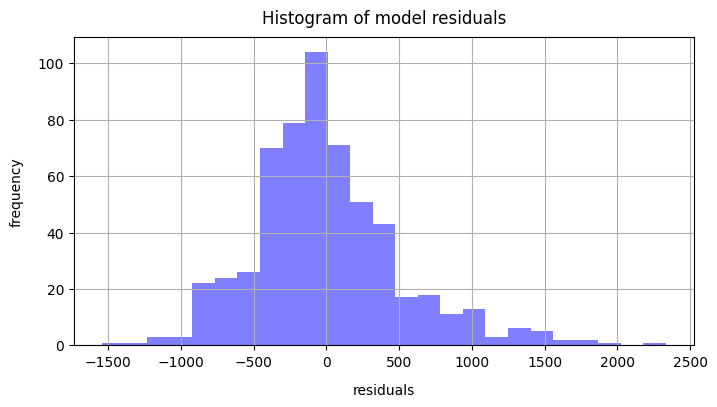

In [11]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

plt.show()

Dieser Code erstellt ein Histogramm der Residuen eines linearen Regressionsmodells. Residuen sind die Differenzen zwischen den beobachteten Werten und den durch das Modell vorhergesagten Werten. Das Histogramm hilft dabei, die Verteilung der Residuen zu visualisieren und zu überprüfen, ob sie normalverteilt sind, was eine Annahme der linearen Regression ist.

### Erklärung des Codes

1. **Erstellen einer neuen Figur**:
   ```python
   fig = plt.figure(figsize=(8,4))
   ```
   Diese Zeile erstellt eine neue Figur mit einer Größe von 8x4 Zoll.

2. **Erstellen des Histogramms**:
   ```python
   n, bins, patches = plt.hist(x=olsres.resid, 
                               bins=25, 
                               color='blue',
                               alpha=0.5)
   ```
   Diese Zeile erstellt ein Histogramm der Residuen ([`olsres.resid`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X35sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A30%7D%7D%5D%2C%22e5bcdb07-d06f-40a6-8b6d-3466c56e2984%22%5D "Go to definition")) mit 25 Bins. Die Farbe der Balken ist blau und die Transparenz ([`alpha`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X35sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A28%7D%7D%5D%2C%22e5bcdb07-d06f-40a6-8b6d-3466c56e2984%22%5D "Go to definition")) ist auf 0.5 gesetzt.

3. **Setzen der Achsenbeschriftungen und des Titels**:
   ```python
   plt.xlabel('residuals', fontsize=10, labelpad=10)
   plt.ylabel('frequency', fontsize=10, labelpad=10)
   plt.title('Histogram of model residuals', fontsize=12, pad=10)
   ```
   Diese Zeilen setzen die Beschriftungen der x- und y-Achse sowie den Titel des Plots. Die Schriftgröße und der Abstand der Beschriftungen werden ebenfalls festgelegt.

4. **Hinzufügen eines Gitters**:
   ```python
   plt.grid()
   ```
   Diese Zeile fügt dem Plot ein Gitter hinzu, um die Lesbarkeit zu verbessern.

5. **Anzeigen des Plots**:
   ```python
   plt.show()
   ```
   Diese Zeile zeigt den Plot an.

### Weitere Beispiele

#### Beispiel 1: Histogramm der Residuen mit 30 Bins und roter Farbe


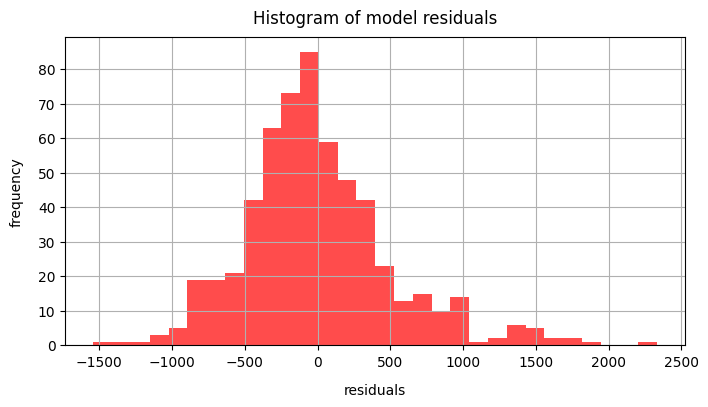

In [25]:
fig = plt.figure(figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=30, 
                            color='red',
                            alpha=0.7)

plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

plt.show()



#### Beispiel 2: Histogramm der Residuen mit 20 Bins und grüner Farbe


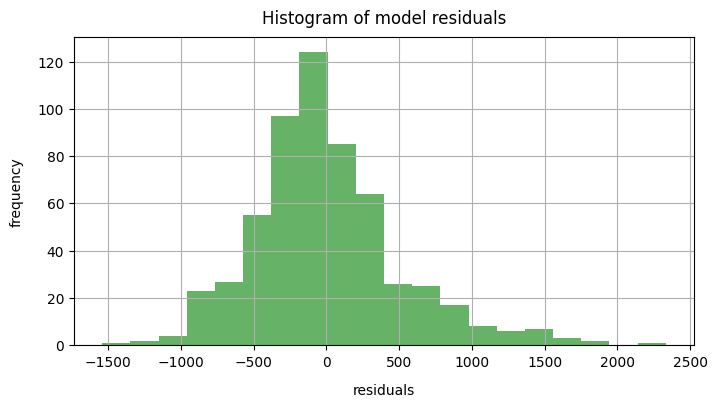

In [26]:
fig = plt.figure(figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=20, 
                            color='green',
                            alpha=0.6)

plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

plt.show()



#### Beispiel 3: Histogramm der Residuen mit 15 Bins und orangefarbener Farbe


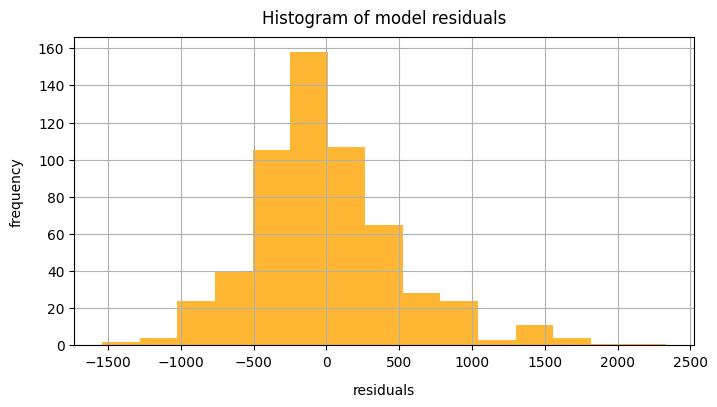

In [27]:
fig = plt.figure(figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=15, 
                            color='orange',
                            alpha=0.8)

plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

plt.show()



Diese Beispiele zeigen, wie man das Histogramm der Residuen mit unterschiedlichen Farben und Bins anpassen kann, um die Verteilung der Residuen zu visualisieren.

### Compare observed prices with predicted prices

In [12]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 1730.3
Observed price: 1640.0, Predicted price: 1600.6
Observed price: 1568.0, Predicted price: 1806.3
Observed price: 2290.0, Predicted price: 2704.6
Observed price: 4950.0, Predicted price: 2519.3
Observed price: 1787.0, Predicted price: 2201.5
Observed price: 3495.0, Predicted price: 3116.8
Observed price: 2450.0, Predicted price: 2471.6
Observed price: 3390.0, Predicted price: 2685.2
Observed price: 2836.0, Predicted price: 2405.3


Dieser Code führt eine Vorhersage der Wohnungspreise basierend auf einem linearen Regressionsmodell durch und vergleicht die vorhergesagten Preise mit den tatsächlichen beobachteten Preisen. Hier ist eine detaillierte Erklärung:

1. **Konstante zu X2_test hinzufügen**:
   ```python
   X2_test_const = sm.add_constant(X2_test)
   ```
   Diese Zeile fügt eine Konstante (Intercept) zu den Testdaten [`X2_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X40sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A32%7D%7D%5D%2C%22531e1091-93da-4bcc-90ae-fb32107f88aa%22%5D "Go to definition") hinzu. Dies ist notwendig, da das Regressionsmodell auch einen Intercept-Term hat.

2. **Vorhersage der Preise**:
   ```python
   predicted_new = olsres.predict(X2_test_const)
   ```
   Diese Zeile verwendet das trainierte Regressionsmodell [`olsres`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X40sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A16%7D%7D%5D%2C%22531e1091-93da-4bcc-90ae-fb32107f88aa%22%5D "Go to definition"), um die Preise für die Testdaten [`X2_test_const`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X40sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22531e1091-93da-4bcc-90ae-fb32107f88aa%22%5D "Go to definition") vorherzusagen.

3. **Vergleich der beobachteten und vorhergesagten Preise**:
   ```python
   for i in range(0,10):
       print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')
   ```
   Diese Schleife durchläuft die ersten 10 Einträge der Testdaten und druckt die tatsächlichen ([`y_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X40sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A29%7D%7D%5D%2C%22531e1091-93da-4bcc-90ae-fb32107f88aa%22%5D "Go to definition")) und vorhergesagten ([`predicted_new`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X40sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A0%7D%7D%5D%2C%22531e1091-93da-4bcc-90ae-fb32107f88aa%22%5D "Go to definition")) Preise aus.

Hier sind drei weitere Beispiele, die ähnliche Vergleiche durchführen:

### Beispiel 1: Vergleich der ersten 5 Preise


In [17]:
# Vergleich der ersten 5 beobachteten und vorhergesagten Preise
for i in range(0, 5):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 1730.3
Observed price: 1640.0, Predicted price: 1600.6
Observed price: 1568.0, Predicted price: 1806.3
Observed price: 2290.0, Predicted price: 2704.6
Observed price: 4950.0, Predicted price: 2519.3




### Beispiel 2: Vergleich der Preise von Index 10 bis 15


In [18]:
# Vergleich der beobachteten und vorhergesagten Preise von Index 10 bis 15
for i in range(10, 16):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 2715.0, Predicted price: 3048.6
Observed price: 1880.0, Predicted price: 1969.8
Observed price: 1730.0, Predicted price: 2147.9
Observed price: 2383.0, Predicted price: 2543.3
Observed price: 1900.0, Predicted price: 1970.6
Observed price: 3400.0, Predicted price: 2614.5




### Beispiel 3: Vergleich der letzten 10 Preise


In [19]:
# Vergleich der letzten 10 beobachteten und vorhergesagten Preise
for i in range(len(y_test)-10, len(y_test)):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 2900.0, Predicted price: 1880.9
Observed price: 2700.0, Predicted price: 2299.8
Observed price: 2170.0, Predicted price: 2568.6
Observed price: 2550.0, Predicted price: 2005.6
Observed price: 1850.0, Predicted price: 1712.9
Observed price: 3850.0, Predicted price: 3376.0
Observed price: 2180.0, Predicted price: 2518.8
Observed price: 2250.0, Predicted price: 1827.1
Observed price: 2120.0, Predicted price: 2098.7
Observed price: 3150.0, Predicted price: 3242.2


Natürlich! Hier sind drei weitere Beispiele für die Anwendung von linearen Regressionsmodellen in Python:

### Beispiel 1: Vorhersage von Hauspreisen


                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.706e+29
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           5.86e-30
Time:                        17:17:47   Log-Likelihood:                 105.35
No. Observations:                   5   AIC:                            -204.7
Df Residuals:                       2   BIC:                            -205.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          -5e+04   8.87e-10  -5.64e+13      0.0

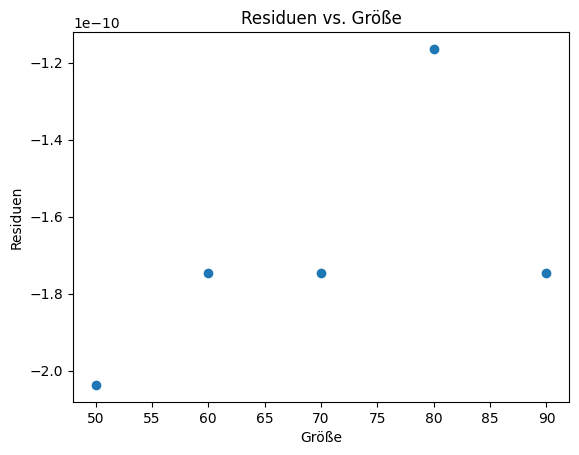

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Beispiel-Daten
data = {
    'Größe': [50, 60, 70, 80, 90],
    'Zimmer': [1, 2, 2, 3, 3],
    'Preis': [200000, 250000, 300000, 350000, 400000]
}
df = pd.DataFrame(data)

# Unabhängige Variablen (Größe und Zimmer)
X = df[['Größe', 'Zimmer']]
X = sm.add_constant(X)  # Konstante hinzufügen

# Abhängige Variable (Preis)
y = df['Preis']

# Lineares Regressionsmodell erstellen
model = sm.OLS(y, X).fit()

# Vorhersagen
predictions = model.predict(X)

# Ergebnisse anzeigen
print(model.summary())
print(f'Vorhersagen: {predictions}')

# Residuen plotten
plt.scatter(df['Größe'], model.resid)
plt.xlabel('Größe')
plt.ylabel('Residuen')
plt.title('Residuen vs. Größe')
plt.show()



### Beispiel 2: Vorhersage von Gehältern basierend auf Erfahrung


                            OLS Regression Results                            
Dep. Variable:                 Gehalt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.667e+31
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           5.17e-48
Time:                        17:18:01   Log-Likelihood:                 128.63
No. Observations:                   5   AIC:                            -253.3
Df Residuals:                       3   BIC:                            -254.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.5e+04    2.2e-12   1.13e+16      0.0

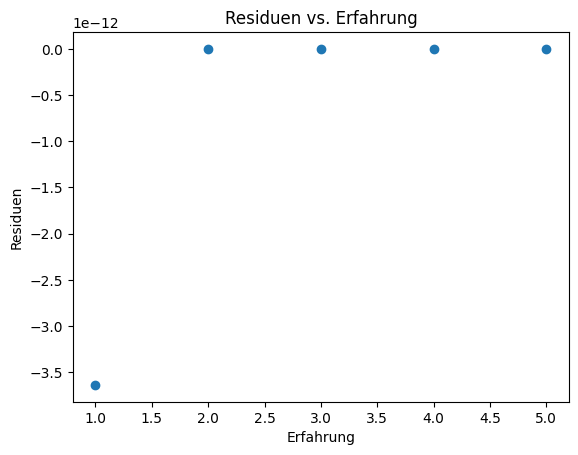

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Beispiel-Daten
data = {
    'Erfahrung': [1, 2, 3, 4, 5],
    'Gehalt': [30000, 35000, 40000, 45000, 50000]
}
df = pd.DataFrame(data)

# Unabhängige Variable (Erfahrung)
X = df['Erfahrung']
X = sm.add_constant(X)  # Konstante hinzufügen

# Abhängige Variable (Gehalt)
y = df['Gehalt']

# Lineares Regressionsmodell erstellen
model = sm.OLS(y, X).fit()

# Vorhersagen
predictions = model.predict(X)

# Ergebnisse anzeigen
print(model.summary())
print(f'Vorhersagen: {predictions}')

# Residuen plotten
plt.scatter(df['Erfahrung'], model.resid)
plt.xlabel('Erfahrung')
plt.ylabel('Residuen')
plt.title('Residuen vs. Erfahrung')
plt.show()



### Beispiel 3: Vorhersage von Verkaufszahlen basierend auf Werbeausgaben


                            OLS Regression Results                            
Dep. Variable:               Verkäufe   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.748e+30
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           9.55e-46
Time:                        17:18:07   Log-Likelihood:                 154.47
No. Observations:                   5   AIC:                            -304.9
Df Residuals:                       3   BIC:                            -305.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.665e-15    1.6e-14     -0.166      0.8

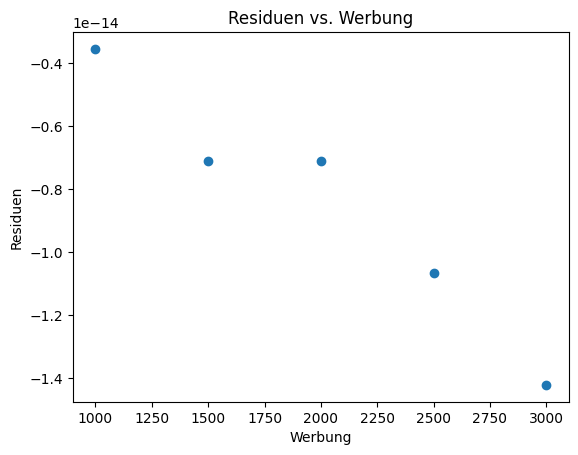

In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Beispiel-Daten
data = {
    'Werbung': [1000, 1500, 2000, 2500, 3000],
    'Verkäufe': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Unabhängige Variable (Werbung)
X = df['Werbung']
X = sm.add_constant(X)  # Konstante hinzufügen

# Abhängige Variable (Verkäufe)
y = df['Verkäufe']

# Lineares Regressionsmodell erstellen
model = sm.OLS(y, X).fit()

# Vorhersagen
predictions = model.predict(X)

# Ergebnisse anzeigen
print(model.summary())
print(f'Vorhersagen: {predictions}')

# Residuen plotten
plt.scatter(df['Werbung'], model.resid)
plt.xlabel('Werbung')
plt.ylabel('Residuen')
plt.title('Residuen vs. Werbung')
plt.show()

Ja, gerne! Der R²-Wert, auch Bestimmtheitsmaß genannt, ist ein statistisches Maß, das die Güte der Anpassung eines linearen Regressionsmodells an die Daten beschreibt. Hier ist eine detaillierte Erklärung:

### Definition
Der R²-Wert gibt an, welcher Anteil der Varianz der abhängigen Variable (z.B. Preis) durch die unabhängigen Variablen (z.B. Größe, Zimmer) erklärt wird. Er liegt immer zwischen 0 und 1.

### Interpretation
- **R² = 0**: Das Modell erklärt keine der Varianz der abhängigen Variable. Die unabhängigen Variablen tragen nichts zur Vorhersage der abhängigen Variable bei.
- **R² = 1**: Das Modell erklärt die gesamte Varianz der abhängigen Variable. Die unabhängigen Variablen erklären perfekt die abhängige Variable.
- **0 < R² < 1**: Der Wert gibt den Anteil der Varianz an, der durch das Modell erklärt wird. Ein höherer R²-Wert bedeutet, dass das Modell die Daten besser erklärt.

### Beispiel
Angenommen, wir haben ein lineares Regressionsmodell, das den Preis von Häusern basierend auf deren Größe und Anzahl der Zimmer vorhersagt. Wenn der R²-Wert 0.85 beträgt, bedeutet das, dass 85% der Varianz der Hauspreise durch die Größe und die Anzahl der Zimmer erklärt werden.

### Berechnung
Der R²-Wert wird wie folgt berechnet:
\[ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} \]
- \( y_i \): Tatsächliche Werte der abhängigen Variable
- \( \hat{y}_i \): Vorhergesagte Werte der abhängigen Variable
- \( \bar{y} \): Durchschnitt der tatsächlichen Werte der abhängigen Variable

### Beispiel in Python
Hier ist ein Beispiel, wie man den R²-Wert in Python berechnet und interpretiert:



In [24]:
import pandas as pd
import statsmodels.api as sm

# Beispiel-Daten
data = {
    'Größe': [50, 60, 70, 80, 90],
    'Zimmer': [1, 2, 2, 3, 3],
    'Preis': [200000, 250000, 300000, 350000, 400000]
}
df = pd.DataFrame(data)

# Unabhängige Variablen (Größe und Zimmer)
X = df[['Größe', 'Zimmer']]
X = sm.add_constant(X)  # Konstante hinzufügen

# Abhängige Variable (Preis)
y = df['Preis']

# Lineares Regressionsmodell erstellen
model = sm.OLS(y, X).fit()

# R²-Wert anzeigen
r_squared = model.rsquared
print(f'R²-Wert: {r_squared:.2f}')

R²-Wert: 1.00




### Interpretation des Ergebnisses
Wenn der R²-Wert beispielsweise 0.92 beträgt, bedeutet das, dass 92% der Varianz der Hauspreise durch die Größe und die Anzahl der Zimmer erklärt werden. Dies deutet darauf hin, dass das Modell eine gute Anpassung an die Daten hat.

### Wichtige Hinweise
- Ein hoher R²-Wert bedeutet nicht unbedingt, dass das Modell gut ist. Es kann auch auf Überanpassung (Overfitting) hinweisen.
- Der R²-Wert allein reicht nicht aus, um die Güte eines Modells zu beurteilen. Es sollten auch andere Metriken und Validierungsmethoden verwendet werden.

Ich hoffe, das hilft Ihnen, den R²-Wert besser zu verstehen!



Diese Beispiele zeigen, wie man lineare Regressionsmodelle in verschiedenen Kontexten anwenden kann, um Vorhersagen zu treffen und die Ergebnisse zu analysieren.

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [20]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-28 17:16:29
Python Version: 3.11.10
-----------------------------------
